In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

plt.style.use("ggplot")

pd.options.display.max_rows = 500

RANDOM_STATE = 42

from sklearn import model_selection
from sklearn import metrics

!conda install graphviz -y
!conda install python-graphviz -y
!conda install pydot -y
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install xgboost
import xgboost as xgb

!pip install lightgbm
import lightgbm as lgb
import json
from pandas.io.json import json_normalize

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



You should consider upgrading via the 'c:\users\meral\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\meral\anaconda3\python.exe -m pip install --upgrade pip' command.


In [65]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans

In [66]:
file_name = "Seedstars_dataset_EDA_v0.csv"

In [67]:
df = pd.read_csv('Seedstars_dataset_EDA_v0.csv', sep=';')

In [68]:
df.head()

,Unnamed: 0,company_id,country,industry,business_stage,incorporated,incorporation_date,Number of team members,accelerator,amount_to_raise,...,revenue_model_subscription_Imputed,revenue_model_freemium_Imputed,revenue_model_advertising_Imputed,revenue_model_licensing_Imputed,customer_type - B-to-B-to-C_Imputed,customer_type - B-to-B_Imputed,customer_type - B-to-C_Imputed,customer_type - B-to-G_Imputed,percent_increase_in_revenue,percent_increase_in_users
0,0,1,Uzbekistan,Consumer Services,Revenue Stage,0.0,2017,4.0,1.0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.459459,9.782609
1,1,224,Uzbekistan,Travel and Transport,Development Stage,0.0,2017,4.0,0.0,30000,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,43.744532,69.230769
2,2,365,Uzbekistan,Financial Services,Beta Testing Stage,1.0,2019,1.0,1.0,3000,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,25000.000000,24.997500
3,3,440,Uzbekistan,Enterprise Services,Revenue Stage,0.0,2017,10.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-14.446054,-20.588235
4,4,866,Uzbekistan,HR,Revenue Stage,1.0,2019,5.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-49.765258,-25.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           4244 non-null   int64  
 1   company_id                           4244 non-null   int64  
 2   country                              4244 non-null   object 
 3   industry                             4244 non-null   object 
 4   business_stage                       4244 non-null   object 
 5   incorporated                         4244 non-null   float64
 6   incorporation_date                   4244 non-null   int64  
 7   Number of team members               4244 non-null   float64
 8   accelerator                          4244 non-null   float64
 9   amount_to_raise                      4244 non-null   int64  
 10  funding at the time of application   4244 non-null   float64
 11  number_employees              

In [70]:
df.describe()

,Unnamed: 0,company_id,incorporated,incorporation_date,Number of team members,accelerator,amount_to_raise,funding at the time of application,number_employees,revenue_1month,...,revenue_model_subscription_Imputed,revenue_model_freemium_Imputed,revenue_model_advertising_Imputed,revenue_model_licensing_Imputed,customer_type - B-to-B-to-C_Imputed,customer_type - B-to-B_Imputed,customer_type - B-to-C_Imputed,customer_type - B-to-G_Imputed,percent_increase_in_revenue,percent_increase_in_users
count,4244.0000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4.244000e+03,4.244000e+03,4244.000000,4.244000e+03,...,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4244.000000,4.244000e+03,4244.000000
mean,2121.5000,2127.248351,0.692036,2015.776390,2.796183,0.340716,1.929602e+05,8.017289e+04,7.404807,7.952500e+03,...,0.651037,0.155514,0.190151,0.104854,0.311970,0.617813,0.416824,0.047125,1.424919e+04,494.164965
std,1225.2816,1229.537298,0.461706,2.294322,1.747878,0.474006,2.252667e+06,4.760203e+05,153.867426,5.767136e+04,...,0.476698,0.362436,0.392466,0.306401,0.463352,0.485979,0.493091,0.211932,2.247453e+05,17894.155749
min,0.0000,1.000000,0.000000,1970.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.500000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.005005e+01,-49.999750
25%,1060.7500,1061.750000,0.000000,2014.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.419941e+01,-23.327113
50%,2121.5000,2126.500000,1.000000,2016.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,3.000000,0.000000e+00,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,3182.2500,3192.250000,1.000000,2017.000000,3.000000,1.000000,1.000000e+05,4.000000e+04,6.000000,2.285250e+03,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000
max,4243.0000,4255.000000,1.000000,2020.000000,18.000000,1.000000,1.402000e+08,2.291489e+07,10000.000000,2.157556e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+07,1000000.000000


In [71]:
df['website_active'].value_counts()

1    2977
0    1267
Name: website_active, dtype: int64

In [72]:
total_features=df.shape[1]
num_features=len((df.select_dtypes(include=np.number)).columns.tolist())
cat_features=total_features-num_features
print(' categorical features: ', cat_features)
print(' numerircal features: ', num_features)

 categorical features:  8
 numerircal features:  47


<AxesSubplot:>

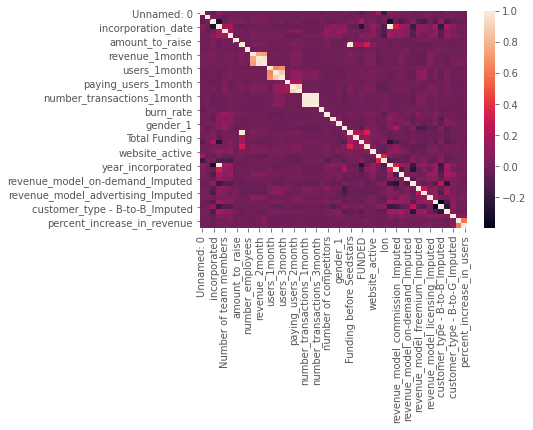

In [73]:
sns.heatmap(df.corr())

In [74]:
num_data = df.select_dtypes(include=np.number)
num_data.shape

(4244, 47)

In [75]:
num_data.columns.tolist()

['Unnamed: 0',
 'company_id',
 'incorporated',
 'incorporation_date',
 'Number of team members',
 'accelerator',
 'amount_to_raise',
 'funding at the time of application',
 'number_employees',
 'revenue_1month',
 'revenue_2month',
 'revenue_3month',
 'users_1month',
 'users_2month',
 'users_3month',
 'paying_users_1month',
 'paying_users_2month',
 'paying_users_3month',
 'number_transactions_1month',
 'number_transactions_2month',
 'number_transactions_3month',
 'burn_rate',
 'number of competitors',
 'gender_0',
 'gender_1',
 'company_logo',
 'Funding before Seedstars',
 'Total Funding',
 'FUNDED',
 'status_of_funding_AMOUNT',
 'website_active',
 'lat',
 'lon',
 'year_incorporated',
 'revenue_model_commission_Imputed',
 'revenue_model_product_Imputed',
 'revenue_model_on-demand_Imputed',
 'revenue_model_subscription_Imputed',
 'revenue_model_freemium_Imputed',
 'revenue_model_advertising_Imputed',
 'revenue_model_licensing_Imputed',
 'customer_type - B-to-B-to-C_Imputed',
 'customer_t

In [76]:
scaler = StandardScaler()
# isomap = Isomap()
# isomap_data = isomap.fit_transform(scaler.fit_transform(num_data))

tsne = TSNE()
tsne_data = tsne.fit_transform(scaler.fit_transform(num_data))

In [77]:
X = tsne_data
y = num_data['website_active']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, shuffle=True, random_state=123)

In [78]:
rf_clf = RandomForestClassifier()
svm_clf = SVC()
logr_clf = LogisticRegressionCV(max_iter=1000)
gb_clf = GradientBoostingClassifier()
adb_clf = AdaBoostClassifier()
dt_clf = DecisionTreeClassifier()


for name, model in zip(['Random Forest', 'SVM', 'Logistic Regression', 'Gradient Boost', 'AdaBoost', 'Decision Tree'],
                       [rf_clf, svm_clf, logr_clf, gb_clf, adb_clf,dt_clf]):
    print('\t',name.upper(),':')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

	 RANDOM FOREST :
Accuracy:  0.8964705882352941
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       118
           1       0.89      0.97      0.93       307

    accuracy                           0.90       425
   macro avg       0.90      0.83      0.86       425
weighted avg       0.90      0.90      0.89       425

	 SVM :
Accuracy:  0.8
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       118
           1       0.78      1.00      0.88       307

    accuracy                           0.80       425
   macro avg       0.89      0.64      0.66       425
weighted avg       0.84      0.80      0.76       425

	 LOGISTIC REGRESSION :
Accuracy:  0.7388235294117647
              precision    recall  f1-score   support

           0       0.82      0.08      0.14       118
           1       0.74      0.99      0.85       307

    accuracy                           0.74       425
   

In [79]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from lightgbm import LGBMRegressor, LGBMClassifier, Booster

In [80]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[22:38:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\meral\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 87.53%
